# Figure 4  - decomposition of cloud feedbacks
Anna Mackie, 2022

For the RCEMIP CRMs, calculates the dynamic, thermodynamic and non-linear components for the two temperature differences (305 - 300 K and 300 - 295 K), for the longwave, shortwave and net cloud feedbacks. Plots these as scatter plots


Also produces Fig 4 with two anomolusly large points taken out (no longer used in manuscript)

In [6]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from scipy import stats
from scipy.interpolate import UnivariateSpline
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
import sys
sys.path.append('..')
import funcs

models = ['CM1',  'dam','ICON_LEM_CRM', 'ICON_NWP_CRM', 'MESONH', 'SAM_CRM', 'SCALE', 'UCLA-CRM',
          'UKMOi-vn11.0-CASIM', 'UKMOi-vn11.0-RA1-T', 'UKMOi-vn11.0-RA1-T-nocloud', 'WRF_COL_CRM']
m = len(models)
cols =  np.load('color_grid.npy', allow_pickle = True)

models_names = ['CM1',  'dam','ICON_LEM_CRM', 'ICON_NWP_CRM', 'MESONH', 'SAM_CRM', 'SCALE', 'UCLA-CRM',
          'UKMO-CASIM', 'UKMO-RA1-T', 'UKMO-nocloud', 'WRF_COL_CRM']


# limits of vertical velocity, common across models
pl = 0.22 # pos limit
nlim= -0.07 # neg limit
bs = 0.001 # bin size

bins = np.arange(nlim, pl, bs) #creates bins
b = len(bins)
print('no of vertical velocity bins: ', b)
mnbin = [] # create array of the mid-point between bin limits for plotting
for i in range(1,b):
    mnbin = np.append(mnbin, np.mean([bins[i-1], bins[i]])*100)


lets = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)']    


no of vertical velocity bins:  291


In [3]:
# constants
arrs = ['lwcrf', 'swcrf']
pLev = 500 # hPa level
alpha = 0.8
comps = ['total', 'dynamic',  'thermodynamic', 'non-linear', 'dyn/tot']
deltaT = 5 # temperature difference
p_cut_off = 0.01 # significance test

## Figure 4



CM1


/home/users/arm33/RCEMIP/allMod/../funcs.py:120: RuntimeWarning: Mean of empty slice
  arrbin = [np.nanmean(arr[dig==i]) for i in range(1,b)]


dam
ICON_LEM_CRM
ICON_NWP_CRM
MESONH
SAM_CRM
SCALE
UCLA-CRM
UKMOi-vn11.0-CASIM
UKMOi-vn11.0-RA1-T
UKMOi-vn11.0-RA1-T-nocloud
WRF_COL_CRM
lw
dyn correlation with thermo: $r^2$ =  0.42 , p value =  0.0005586469324543247
sw
dyn correlation with thermo: $r^2$ =  0.0 , p value =  0.9822450243216863
net
dyn correlation with thermo: $r^2$ =  0.05 , p value =  0.27679109453528816


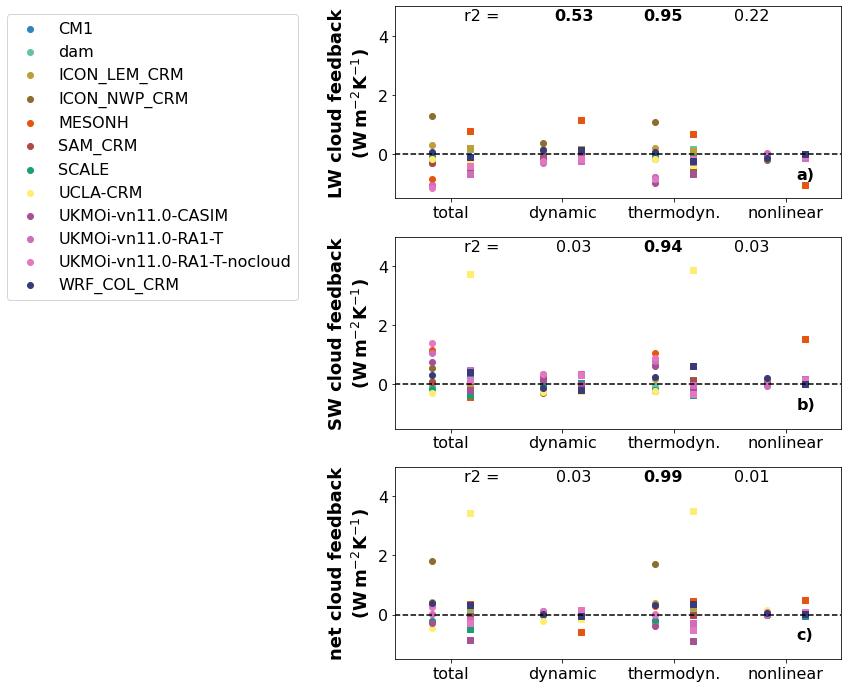

In [7]:
fig1, axes1 = plt.subplots(3,1)

xarr = [1,2,3, 4]
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0, len(labels) + 1)
    ax.plot([0, len(labels) + 1], [0,0], 'k--')
    
labels = ['total', 'dynamic', 'thermodyn.', 'nonlinear']
array  = ['lw', 'sw', 'net']
for i in range(3):
    
    ax = axes1[i]
    set_axis_style(ax, labels)
    
textstr = 'LW cloud feedback\n(W$\,$m$^{-2}$K$^{-1}$)'
axes1[0].text(-0.1, 0.5, textstr, fontsize=18, horizontalalignment='center', weight = 'bold',
                        verticalalignment='center',transform=axes1[0].transAxes, rotation = 90)
textstr = 'SW cloud feedback\n(W$\,$m$^{-2}$K$^{-1}$)'
axes1[1].text(-0.1, 0.5, textstr, fontsize=18, horizontalalignment='center', weight = 'bold',
                        verticalalignment='center',transform=axes1[1].transAxes, rotation = 90)

textstr = 'net cloud feedback\n(W$\,$m$^{-2}$K$^{-1}$)'
axes1[2].text(-0.1, 0.5, textstr, fontsize=18, horizontalalignment='center', weight = 'bold',
                        verticalalignment='center',transform=axes1[2].transAxes, rotation = 90)

# put anomalies back in: MESONH and UCLA @305-300
anom = 0

### CRMs ###
dynr, totr, thr, nlr, dynthr = np.zeros((3,2*m -anom)),np.zeros((3,2*m-anom)),np.zeros((3,2*m-anom)),np.zeros((3,2*m-anom)),np.zeros((3,2*m -anom))
c=0

for k in range(m):   
    
    model = models[k]
    print(model)
    dp = '/home/users/arm33/RCEMIP/'+ model +'/processed_new/3D/large'
    dp2 = '/home/users/arm33/RCEMIP/'+ model +'/processed_new/2D/large'
    for j in [0,1]:
        if j==0:
            con,new = '295', '300'
            marker = 'o'
            
            #295
            wa = np.load(dp + con + 'wa_profile_25d.npy', allow_pickle = True)
            pa = np.load(dp + con + 'pa_profile_25d.npy', allow_pickle = True)/100
            wa500_alltemp = np.empty((3,np.shape(wa)[0],np.shape(wa)[2], np.shape(wa)[3]))
            wa500_alltemp[0,] = funcs.getPlevel(wa, pa, pLev)
            #300
            wa = np.load(dp + new + 'wa_profile_25d.npy', allow_pickle = True)
            pa = np.load(dp + new + 'pa_profile_25d.npy', allow_pickle = True)/100
            wa500_alltemp[1,] = funcs.getPlevel(wa, pa, pLev)

            
        if j==1:
            con,new = '300', '305'
            marker = 's'
            #305
            wa = np.load(dp + new + 'wa_profile_25d.npy', allow_pickle = True)
            pa = np.load(dp + new + 'pa_profile_25d.npy', allow_pickle = True)/100
            wa500_alltemp[2,] = funcs.getPlevel(wa, pa, pLev)
        
        for i in [0,1,2]:
            
            if i==0 or i==1:
                arr = arrs[i]
                #calc dynamic effect with 3D data
                crf1 = np.load(dp2 +  con + arr +'24hrs.npy', allow_pickle = True)
                crf2 = np.load(dp2 + new + arr +'24hrs.npy', allow_pickle = True)
            
            elif i==2:
                crf1 = np.load(dp2 + con + 'lwcrf24hrs.npy', allow_pickle = True) + np.load(dp2 +  con + 'swcrf24hrs.npy', allow_pickle = True)
                crf2 = np.load(dp2 + new + 'lwcrf24hrs.npy', allow_pickle = True) + np.load(dp2 + new + 'swcrf24hrs.npy', allow_pickle = True)

            
            wa5001 = wa500_alltemp[j,]
            wa5002 = wa500_alltemp[j+1,]
            
            #control functions
            dig1 = np.digitize(wa5001, bins)
            A1 = funcs.createA(dig1, b)
            R1 = funcs.createR(crf1, dig1, b)
            R1 = funcs.rpTrailingZeros(A1,R1)
            #new functions
            dig2 = np.digitize(wa5002, bins)
            A2 = funcs.createA(dig2, b)
            R2 = funcs.createR(crf2, dig2, b)
            R2 = funcs.rpTrailingZeros(A2,R2)
            
            dR = R2 - R1
            dA = A2 - A1
                       
            tot, th, dyn, nl = funcs.decompose(A1, A2, R1, R2, deltaT)
            
            dynr[i,c] = dyn           
            thr[i,c] = th
            totr[i,c] = tot
            nlr[i,c] = nl
            dynthr[i,c] = dyn + th
            
            if j==0:
                adj = 0.08
            else:
                adj = -0.08
            
            if i==0 and j==0:
                axes1[i].scatter([0.75 + j/2 + adj], tot, marker = marker, color = cols[k], label = model)
            else:
                axes1[i].scatter([0.75 + j/2+ adj], tot, marker = marker, color = cols[k])
            axes1[i].scatter([1.75+ j/2+ adj], dyn, marker = marker, color = cols[k])
            axes1[i].scatter([2.75+ j/2+ adj], th, marker = marker, color = cols[k])
            axes1[i].scatter([3.75+ j/2+ adj], nl, marker = marker, color = cols[k])
           
        c+=1

ps = np.zeros((3,3))   
for i in [0,1,2]: # i indexes LW/SW/tot arrays
    
    #dynamic
    x = dynr[i,:]
    y = totr[i,:]
    slope, intercept, r_value, p_value, stderr = stats.linregress(x,y)
    txtstr_dyn = str(round(r_value**2,2))
    if p_value < p_cut_off:
        ps[i,0] = 1.0
    
    #thermo
    x= thr[i,:]
    y = totr[i,:]
    slope, intercept, r_value, p_value, stderr = stats.linregress(x,y)
    txtstr_th = str(round(r_value**2,2))
    if p_value < p_cut_off:
        ps[i,1] = 1.0
      
    
    #dynamic vs thermodynamic
    print(array[i])
    slope, intercept, r_value, p_value, stderr = stats.linregress(dynr[i,:], thr[i,:])
    print ('dyn correlation with thermo: $r^2$ = ', str(round(r_value**2,2)), ', p value = ', p_value ) # for information
    
    #nonlinear
    slope, intercept, r_value, p_value, stderr = stats.linregress(nlr[i,:], totr[i,:])
    txtstr_nl = str(round(r_value**2,2)) 
    if p_value < p_cut_off:
        ps[i,2] = 1.0
    
    #add r2 values
    axes1[i].text(0.2, 0.95, 'r2 = ', horizontalalignment='center',
                            verticalalignment='center',transform=axes1[i].transAxes)
    
    if ps[i,0] == 1.0: # dynamic
        axes1[i].text(0.4, 0.95, txtstr_dyn, horizontalalignment='center',
                           verticalalignment='center',transform=axes1[i].transAxes, weight= 'bold')
    else:
        axes1[i].text(0.4, 0.95, txtstr_dyn, horizontalalignment='center',
                           verticalalignment='center',transform=axes1[i].transAxes)
    if ps[i,1] ==1.0: # thermodyamic
        axes1[i].text(0.6, 0.95, txtstr_th, horizontalalignment='center',
                            verticalalignment='center',transform=axes1[i].transAxes, weight = 'bold')
    else:
        axes1[i].text(0.6, 0.95, txtstr_th, horizontalalignment='center',
                            verticalalignment='center',transform=axes1[i].transAxes)
    if ps[i,2]==1.0: # nonlinear
        axes1[i].text(0.8, 0.95, txtstr_nl, horizontalalignment='center',
                            verticalalignment='center',transform=axes1[i].transAxes, weight = 'bold')
    else:
        axes1[i].text(0.8, 0.95, txtstr_nl, horizontalalignment='center',
                            verticalalignment='center',transform=axes1[i].transAxes)
    
    
    axes1[i].text(0.9, 0.1, lets[i], fontweight = 'bold',transform=axes1[i].transAxes)
    

        
fig1.set_size_inches(8,12)
fig1.subplots_adjust(wspace = 0.05)
plt.setp(axes1, ylim = [-1.5,5], xlim = [0.5,4.5])
axes1[0].legend(bbox_to_anchor = (-0.2, 1.0))
fig1.savefig('revised_plots/Fig4.pdf', bbox_inches = 'tight')


 ## Fig 4 without outliers
 

CM1


/home/users/arm33/RCEMIP/allMod/../funcs.py:120: RuntimeWarning: Mean of empty slice
  arrbin = [np.nanmean(arr[dig==i]) for i in range(1,b)]


dam
ICON_LEM_CRM
ICON_NWP_CRM
MESONH
SAM_CRM
SCALE
UCLA-CRM
UKMOi-vn11.0-CASIM
UKMOi-vn11.0-RA1-T
UKMOi-vn11.0-RA1-T-nocloud
WRF_COL_CRM
lw
dyn correlation with thermo: $r^2$ =  0.43 , p value =  0.0008927230025340252
sw
dyn correlation with thermo: $r^2$ =  0.0 , p value =  0.8979669434547352
net
dyn correlation with thermo: $r^2$ =  0.02 , p value =  0.5344365104194777


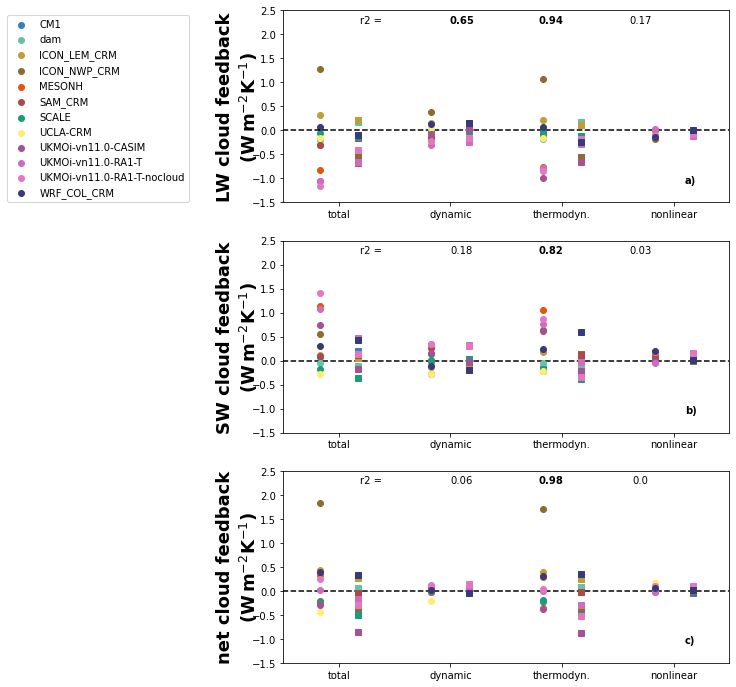

In [4]:
fig1, axes1 = plt.subplots(3,1) # feedbacks plot

xarr = [1,2,3, 4]
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0, len(labels) + 1)
    ax.plot([0, len(labels) + 1], [0,0], 'k--')
    
labels = ['total', 'dynamic', 'thermodyn.', 'nonlinear']
array  = ['lw', 'sw', 'net']
for i in range(3):
    
    ax = axes1[i]
    set_axis_style(ax, labels)
    
textstr = 'LW cloud feedback\n(W$\,$m$^{-2}$K$^{-1}$)'
axes1[0].text(-0.1, 0.5, textstr, fontsize=18, horizontalalignment='center', weight = 'bold',
                        verticalalignment='center',transform=axes1[0].transAxes, rotation = 90)
textstr = 'SW cloud feedback\n(W$\,$m$^{-2}$K$^{-1}$)'
axes1[1].text(-0.1, 0.5, textstr, fontsize=18, horizontalalignment='center', weight = 'bold',
                        verticalalignment='center',transform=axes1[1].transAxes, rotation = 90)

textstr = 'net cloud feedback\n(W$\,$m$^{-2}$K$^{-1}$)'
axes1[2].text(-0.1, 0.5, textstr, fontsize=18, horizontalalignment='center', weight = 'bold',
                        verticalalignment='center',transform=axes1[2].transAxes, rotation = 90)


# number of anomalies: MESONH and UCLA @305-300
anom = 2

### CRMs ###
#create empty arrays
dynr, totr, thr, nlr, dynthr = np.zeros((3,2*m -anom)),np.zeros((3,2*m-anom)),np.zeros((3,2*m-anom)),np.zeros((3,2*m-anom)),np.zeros((3,2*m -anom))
c=0

for k in range(m):   
    
    model = models[k]
    print(model)
    dp = '/home/users/arm33/RCEMIP/'+ model +'/processed_new/3D/large'
    dp2 = '/home/users/arm33/RCEMIP/'+ model +'/processed_new/2D/large'
    for j in [0,1]: # loop over lower and higher temperature differences
        if j==1 and model == 'UCLA-CRM': # remove two anomalies
            break
        if j==1 and model == 'MESONH':
            break
        if j==0:
            # lower temperature difference
            
            con,new = '295', '300'
            marker = 'o'
            
            #295
            wa = np.load(dp + con + 'wa_profile_25d.npy', allow_pickle = True)
            pa = np.load(dp + con + 'pa_profile_25d.npy', allow_pickle = True)/100
            wa500_alltemp = np.empty((3,np.shape(wa)[0],np.shape(wa)[2], np.shape(wa)[3]))
            wa500_alltemp[0,] = funcs.getPlevel(wa, pa, pLev)# see note in firstFig.ipynb about method for finding 500 hPa
            #300
            wa = np.load(dp + new + 'wa_profile_25d.npy', allow_pickle = True)
            pa = np.load(dp + new + 'pa_profile_25d.npy', allow_pickle = True)/100
            wa500_alltemp[1,] = funcs.getPlevel(wa, pa, pLev)

            
        if j==1:
            # high temperature difference
            con,new = '300', '305'
            marker = 's'
            #305
            wa = np.load(dp + new + 'wa_profile_25d.npy', allow_pickle = True)
            pa = np.load(dp + new + 'pa_profile_25d.npy', allow_pickle = True)/100
            wa500_alltemp[2,] = funcs.getPlevel(wa, pa, pLev)
        
        for i in [0,1,2]:
            
            if i==0 or i==1: # lw and sw cloud radiative effect data
                arr = arrs[i]
                #calc dynamic effect 
                crf1 = np.load(dp2 +  con + arr +'24hrs.npy', allow_pickle = True)
                crf2 = np.load(dp2 + new + arr +'24hrs.npy', allow_pickle = True)
            
            elif i==2: # net cloud radiative effect data
                crf1 = np.load(dp2 + con + 'lwcrf24hrs.npy', allow_pickle = True) + np.load(dp2 +  con + 'swcrf24hrs.npy', allow_pickle = True)
                crf2 = np.load(dp2 + new + 'lwcrf24hrs.npy', allow_pickle = True) + np.load(dp2 + new + 'swcrf24hrs.npy', allow_pickle = True)

            #add into arrays
            wa5001 = wa500_alltemp[j,]
            wa5002 = wa500_alltemp[j+1,]
            
            # lower temperature functions
            dig1 = np.digitize(wa5001, bins)
            A1 = funcs.createA(dig1, b)
            R1 = funcs.createR(crf1, dig1, b)
            R1 = funcs.rpTrailingZeros(A1,R1)
            # higher temperauture functions
            dig2 = np.digitize(wa5002, bins)
            A2 = funcs.createA(dig2, b)
            R2 = funcs.createR(crf2, dig2, b)
            R2 = funcs.rpTrailingZeros(A2,R2)
            
            dR = R2 - R1
            dA = A2 - A1
                       
            tot, th, dyn, nl = funcs.decompose(A1, A2, R1, R2, deltaT) # decompose into dynamic, thermodynamic and nonlinear
            
            #add to empty arrays
            dynr[i,c] = dyn           
            thr[i,c] = th
            totr[i,c] = tot
            nlr[i,c] = nl
            dynthr[i,c] = dyn + th
            
            # plot
            if j==0:
                adj = 0.08
            else:
                adj = -0.08
            if i==0 and j==0:
                axes1[i].scatter([0.75 + j/2+ adj], tot, marker = marker, color = cols[k], label = model)
            else:
                axes1[i].plot([0.75 + j/2 + adj], tot, marker = marker, color = cols[k])
            axes1[i].plot([1.75+ j/2 + adj], dyn, marker = marker, color = cols[k])
            axes1[i].plot([2.75+ j/2 + adj], th, marker = marker, color = cols[k])
            axes1[i].plot([3.75+ j/2 + adj], nl, marker = marker, color = cols[k])
           
        c+=1

#calculation of correlation coefficients        

ps = np.zeros((3,3))   # empty array for whether passes significance test
for i in [0,1,2]: # i indexes LW/SW/tot arrays
    
    #dynamic
    x = dynr[i,:]
    y = totr[i,:]
    slope, intercept, r_value, p_value, stderr = stats.linregress(x,y)
    txtstr_dyn = str(round(r_value**2,2))
    if p_value < p_cut_off: # if significant to p < 0.01, add a 1
        ps[i,0] = 1.0
    
    #thermo
    x= thr[i,:]
    y = totr[i,:]
    slope, intercept, r_value, p_value, stderr = stats.linregress(x,y)
    txtstr_th = str(round(r_value**2,2))
    if p_value < p_cut_off:
        ps[i,1] = 1.0
      
    
    #dynamic vs thermodynamic
    print(array[i])
    slope, intercept, r_value, p_value, stderr = stats.linregress(dynr[i,:], thr[i,:])
    print ('dyn correlation with thermo: $r^2$ = ', str(round(r_value**2,2)), ', p value = ', p_value ) # for information
    
    # nonlinear
    slope, intercept, r_value, p_value, stderr = stats.linregress(nlr[i,:], totr[i,:])
    txtstr_nl = str(round(r_value**2,2)) 
    if p_value < p_cut_off:
        ps[i,2] = 1.0
    
    #add r2 values to plots, bold if p < 0.01
    axes1[i].text(0.2, 0.95, 'r2 = ', horizontalalignment='center',
                            verticalalignment='center',transform=axes1[i].transAxes)
    
    if ps[i,0] == 1.0: # dynamic
        axes1[i].text(0.4, 0.95, txtstr_dyn, horizontalalignment='center',
                           verticalalignment='center',transform=axes1[i].transAxes, weight= 'bold')
    else:
        axes1[i].text(0.4, 0.95, txtstr_dyn, horizontalalignment='center',
                           verticalalignment='center',transform=axes1[i].transAxes)
    if ps[i,1] ==1.0: # thermodyamic
        axes1[i].text(0.6, 0.95, txtstr_th, horizontalalignment='center',
                            verticalalignment='center',transform=axes1[i].transAxes, weight = 'bold')
    else:
        axes1[i].text(0.6, 0.95, txtstr_th, horizontalalignment='center',
                            verticalalignment='center',transform=axes1[i].transAxes)
    if ps[i,2]==1.0: # nonlinear
        axes1[i].text(0.8, 0.95, txtstr_nl, horizontalalignment='center',
                            verticalalignment='center',transform=axes1[i].transAxes, weight = 'bold')
    else:
        axes1[i].text(0.8, 0.95, txtstr_nl, horizontalalignment='center',
                            verticalalignment='center',transform=axes1[i].transAxes)
    
    
    axes1[i].text(0.9, 0.1, lets[i], fontweight = 'bold',transform=axes1[i].transAxes)
    

        
fig1.set_size_inches(8,12)
fig1.subplots_adjust(wspace = 0.05)
plt.setp(axes1, ylim = [-1.5,2.5], xlim = [0.5,4.5])
axes1[0].legend(bbox_to_anchor = (-0.2, 1.0))
#fig1.savefig('revised_plots/Fig4.pdf', bbox_inches = 'tight')
